In [1]:
import numpy as np
import pandas as pd
import os
import requests
import io
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans
#from scipy.cluster.hierarchy import fcluster
#import fastcluster
from scipy.cluster.hierarchy import dendrogram, cophenet,linkage
from scipy.spatial.distance import pdist
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering 
import scipy.cluster.hierarchy as shc
import seaborn as sns
!pip install hdbscan
import hdbscan

from sklearn.mixture import GaussianMixture

     |████████████████████████████████| 4.4MB 3.3MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.24-cp36-cp36m-linux_x86_64.whl size=2360735 sha256=54b8f343d95c011f40f5de031a32e5b14b30dcc9f7141e6a8970f5fcc70e52aa
  Stored in directory: /root/.cache/pip/wheels/6a/5a/ab/a3247c72fa70b67699d5f8be94bd0c2d3d38864825d773b9f1
Successfully built hdbscan


In [0]:
url="https://raw.githubusercontent.com/mal258/machinelearning258/master/datasets/heart.csv"
file=requests.get(url).content
heart_data=pd.read_csv(io.StringIO(file.decode('utf-8')),sep=',')

In [3]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.891089
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.203480
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000


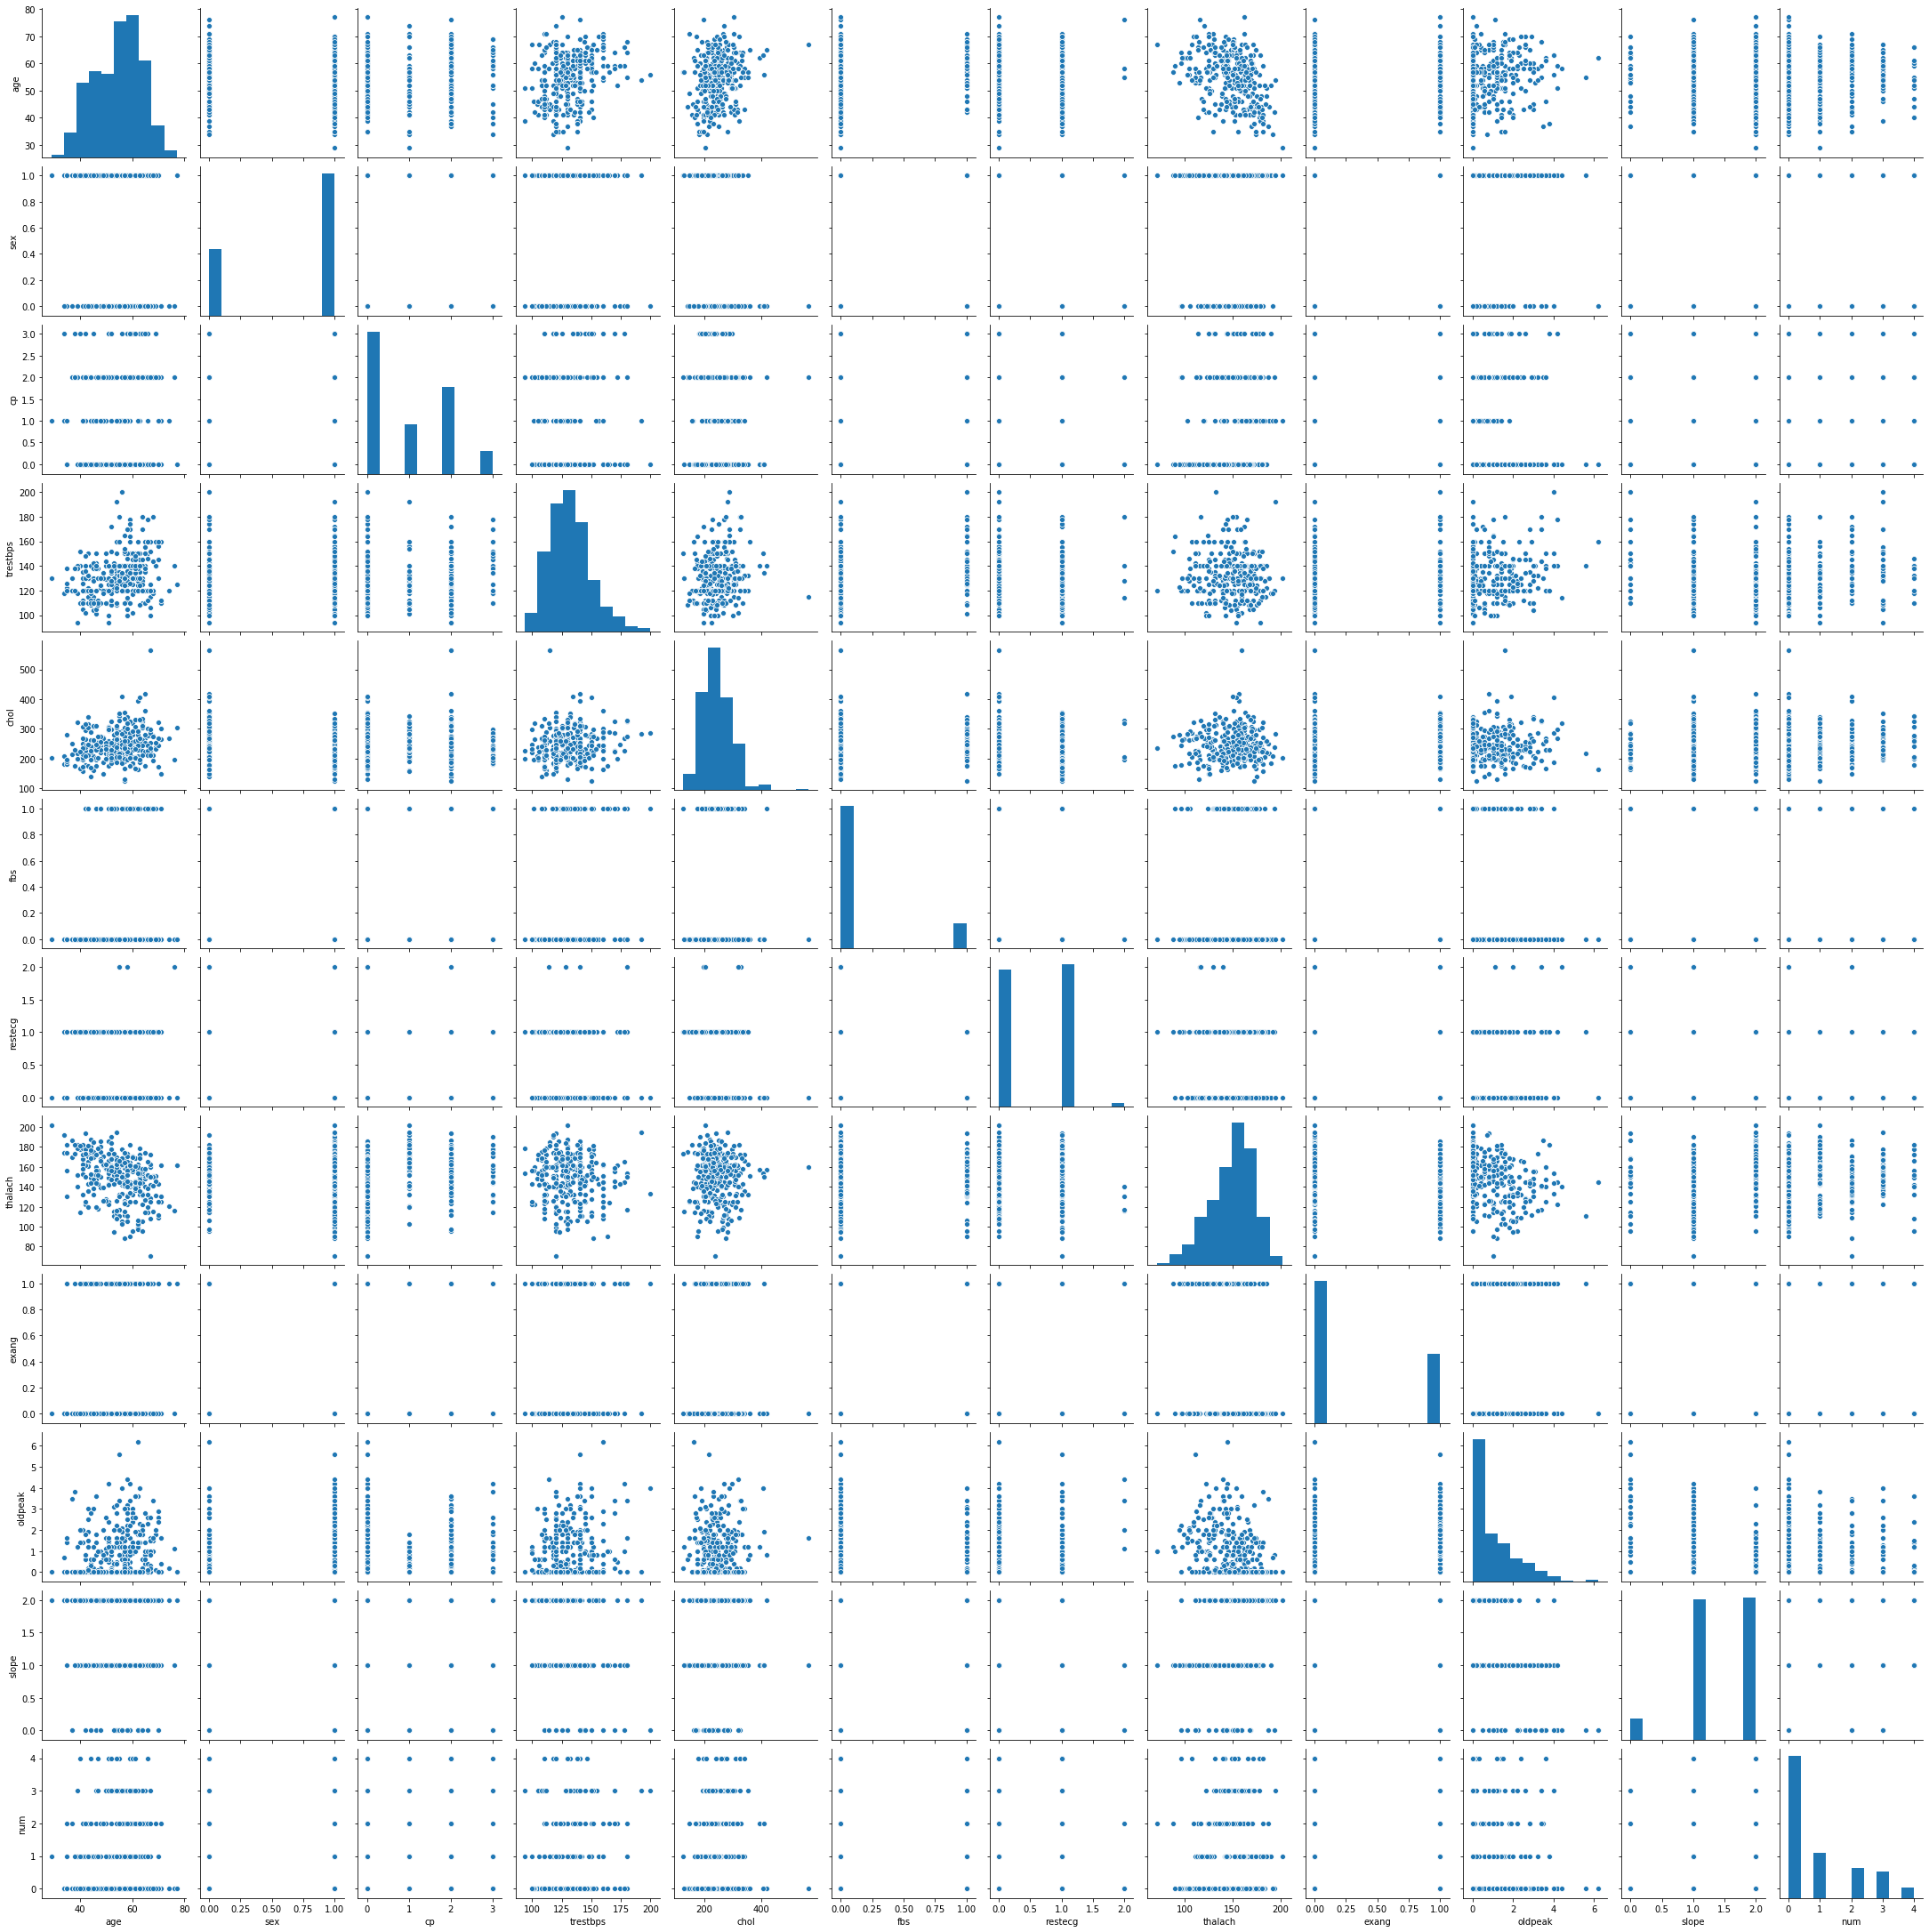

In [4]:
sns.pairplot(heart_data)

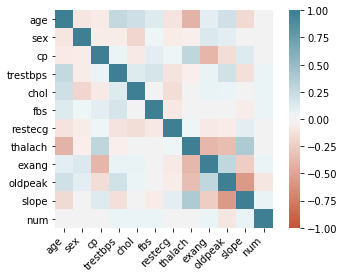

In [5]:
correlation = heart_data.corr()
ax = sns.heatmap(
    correlation, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [6]:
heart_data['chol'].value_counts()

234    6
204    6
197    6
269    5
212    5
      ..
278    1
281    1
284    1
290    1
564    1
Name: chol, Length: 152, dtype: int64

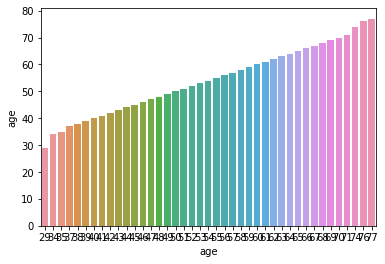

In [7]:
sns.barplot(x=heart_data.groupby('age')['sex'].count().reset_index()['age'],y=heart_data.groupby('age')['sex'].count().reset_index()['age'])

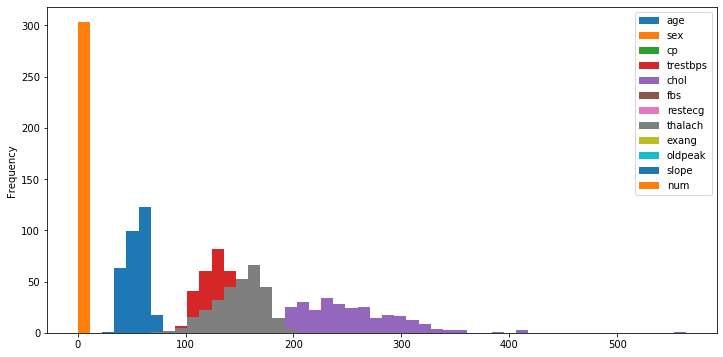

In [8]:
heart_data.plot(kind='hist',bins=50,figsize=(12,6))

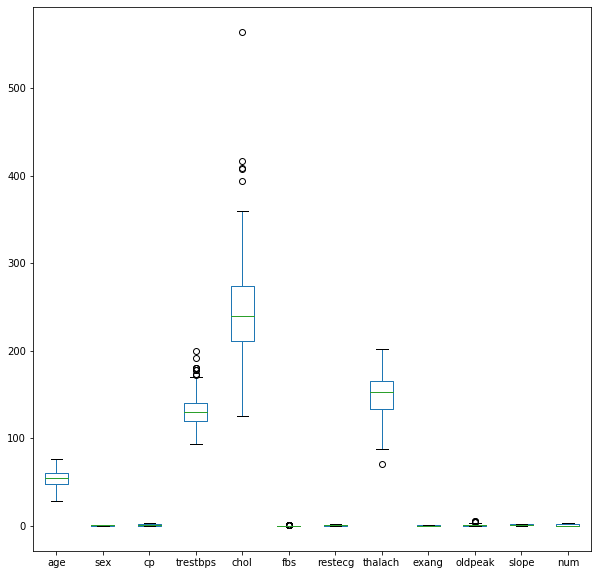

In [9]:
heart_data.plot.box(figsize=(10,10))

In [10]:
heart_data.iloc[:,[0,1,2,3,4,5,6,7]]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach
0,63,1,3,145,233,1,0,150
1,37,1,2,130,250,0,1,187
2,41,0,1,130,204,0,0,172
3,56,1,1,120,236,0,1,178
4,57,0,0,120,354,0,1,163
...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123
299,45,1,3,110,264,0,1,132
300,68,1,0,144,193,1,1,141
301,57,1,0,130,131,0,1,115


In [0]:
X_heart = heart_data.iloc[:,[0,1,2,3,4,5,6,7]]

In [0]:
# Scaling Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_heart)

In [0]:
gmm=GaussianMixture(n_components=2, covariance_type="spherical").fit(heart_data)
labels = gmm.predict(heart_data)

No handles with labels found to put in legend.


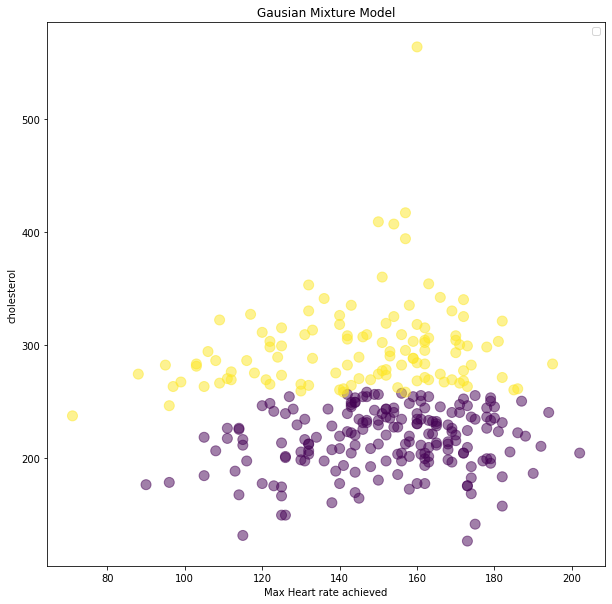

In [40]:
plt.figure(figsize=(10,10))
plt.scatter(heart_data.values[:, 7], heart_data.values[:, 4], c=labels, s=100, alpha=0.5)
plt.title('Gausian Mixture Model')
plt.xlabel('Max Heart rate achieved')
plt.ylabel('cholesterol')
plt.legend()
plt.show()

In [0]:
gmm=GaussianMixture(n_components=2, covariance_type="diag").fit(heart_data)
labels = gmm.predict(heart_data)

No handles with labels found to put in legend.


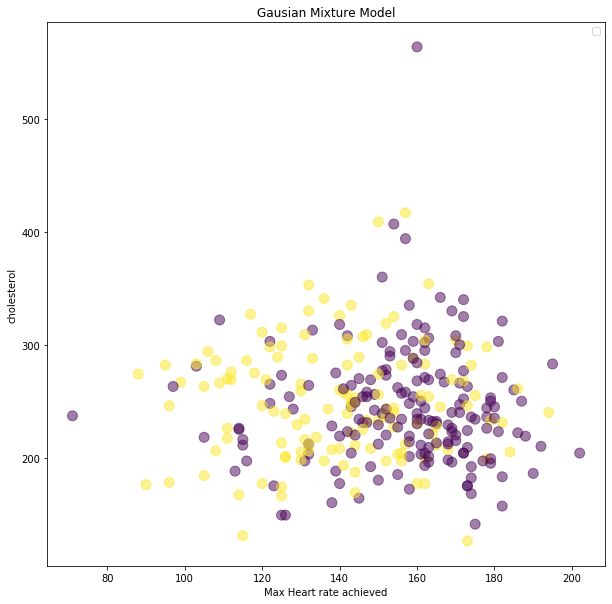

In [29]:
plt.figure(figsize=(10,10))
plt.scatter(heart_data.values[:, 7], heart_data.values[:, 4], c=labels, s=100, alpha=0.5)
plt.title('Gausian Mixture Model')
plt.xlabel('Max Heart rate achieved')
plt.ylabel('cholesterol')
plt.legend()
plt.show()

In [0]:
gmm=GaussianMixture(n_components=2, covariance_type="tied").fit(heart_data)
labels = gmm.predict(heart_data)

No handles with labels found to put in legend.


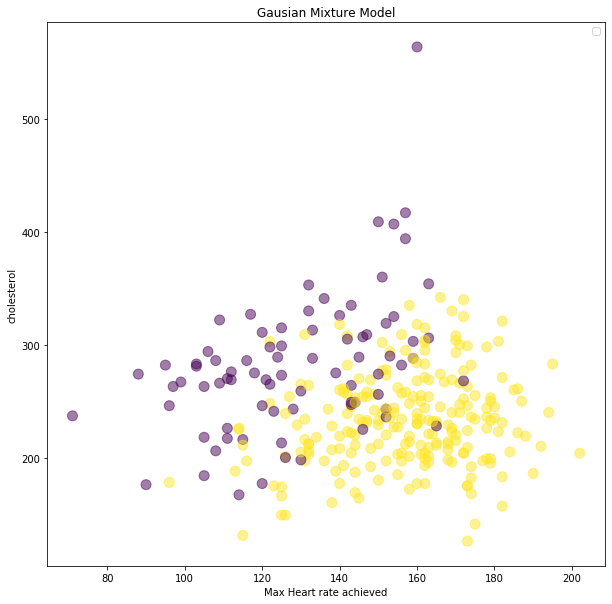

In [34]:
plt.figure(figsize=(10,10))
plt.scatter(heart_data.values[:, 7], heart_data.values[:, 4], c=labels, s=100, alpha=0.5)
plt.title('Gausian Mixture Model')
plt.xlabel('Max Heart rate achieved')
plt.ylabel('cholesterol')
plt.legend()
plt.show()

In [0]:
gmm=GaussianMixture(n_components=2, covariance_type="full").fit(heart_data)
labels = gmm.predict(heart_data)

No handles with labels found to put in legend.


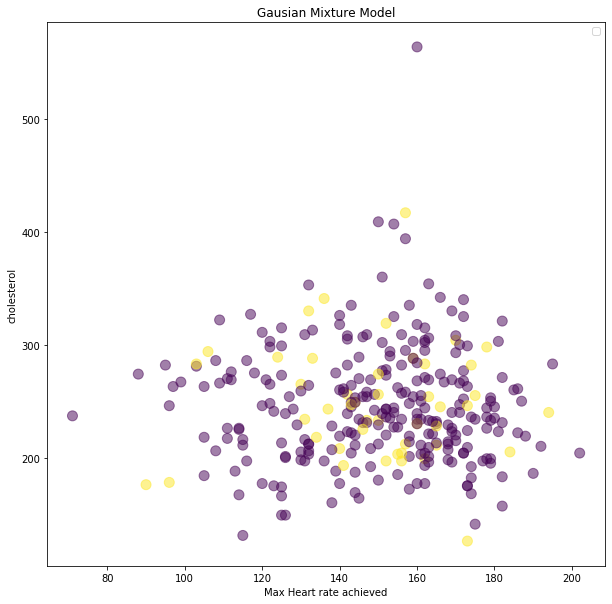

In [36]:
plt.figure(figsize=(10,10))
plt.scatter(heart_data.values[:, 7], heart_data.values[:, 4], c=labels, s=100, alpha=0.5)
plt.title('Gausian Mixture Model')
plt.xlabel('Max Heart rate achieved')
plt.ylabel('cholesterol')
plt.legend()
plt.show()

## K-means Clustering

In [0]:
from sklearn.cluster import KMeans
kmeans_heart = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10)
y_kmeans_heart = kmeans_heart.fit_predict(heart_data)

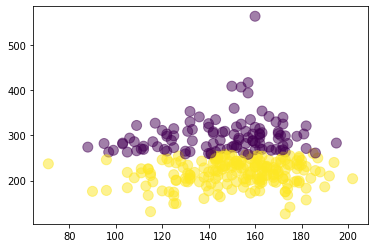

In [38]:
plt.scatter(heart_data.values[:, 7], heart_data.values[:, 4], c=y_kmeans_heart, s=100, alpha=0.5)